# Radial basis network

## 1. Dataset

Se utilizará un conjunto de datos generados artificialmente siguiendo la siguiente función subyacente:

$f(x) = x * 5 *\pi$

Para alejarnos un poco del entorno artificial, le agregaremos ruido en base a su dispersión de un 30%.
Se han generado $10000$ datos y se ha escogido aleatoriamente una muestra de $100$ datos.

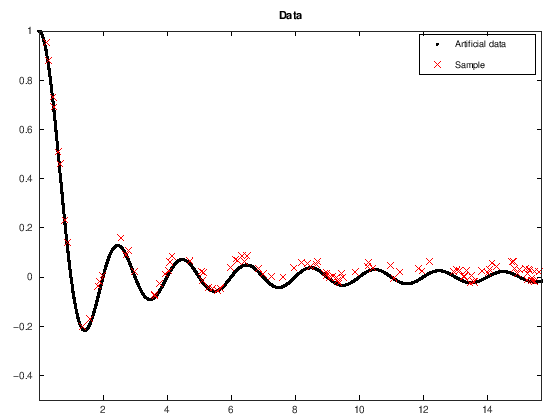

In [1]:
clear all
pkg load statistics

% Número de ejempjos
n_data= 10000;

% Generación de datos
X_real = rand(1,n_data) * (5*pi);                    
y_real  = sinc(X_real);

% Generación de ruido
noise     = 0.3 * std(y_real) ;
y_noise = noise * rand(1, n_data);

%Agregación del ruido
y_noise = y_real + y_noise;

% Muestra
n_sample = n_data * 0.01;
all_ind = randperm(n_data);
ind_sample = all_ind(1:n_sample);

X =X_real(ind_sample)';
y = y_noise(ind_sample)';



plot(X_real, y_real, '.k'), hold on 
plot(X, y,'xr'), hold off
title("Data")
legend("Artificial data", "Sample")
axis([min(X_real) max(X_real) -0.5 1])

## 2.Implementación de la Red de Base radial

In [2]:
function phi = computePhi(X, centers, width)
    if size(width, 2) == 1
        variances = width * ones(1, size(centers, 2));
    else
        variances = width;
    end
    
    phi(size(X , 1), size(centers, 2)) = 0;
    
    for i=1:size(centers, 2),
        phi(:, i) = normpdf(X, centers(:, i), variances(i));
    end
end

In [3]:
function W = train(X, y, centers, widths)
    phi = computePhi(X, centers, widths);
    W = pinv(phi) * y;
end

In [4]:
function y = predict(X, centers, widths, W)
    phi = computePhi(X, centers, widths);
    y = (phi * W)';
end

## 3. Partición de datos

In [5]:
n_examples = size(X,1);
n_train_examples = n_examples * 0.6;
n_test_examples = n_examples - n_train_examples;

ind = randperm(n_examples);
ind_train = ind(1:n_train_examples);
ind_test = ind(n_train_examples+1:end);

In [6]:
X_train = X(ind_train,:);
y_train = y(ind_train,:);
X_test = X(ind_test,:);
y_test = y(ind_test,:);

## 4. Entrenamiento de la red

In [7]:
n_centers = 10
centers = linspace(min(X) ,max(X), 10);
n_hidden_layers = 10;

width = (max(centers) - min(centers)) / (sqrt(2*n_hidden_layers))
W = train(X_train, y_train, centers, width);

n_centers =  10
width =  3.4395


## 5. Evaluación de la red.

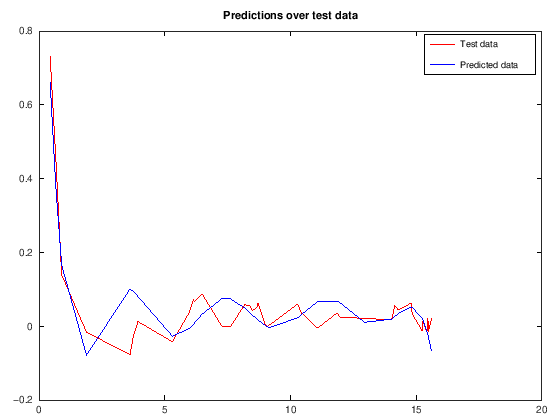

In [25]:
y_predict = predict(X_test, centers, width, W);

[x, i] = sort(X_test);

plot(x, y_test(i), 'r'),hold on;
plot(x, y_predict(i), 'b'), hold off;
title("Predictions over test data")
legend("Test data", "Predicted data")